In [1]:
import numpy as np
import matplotlib.pyplot as plt

import lenstronomy.Util.util as util
from lenstronomy.SimulationAPI.sim_api import SimAPI
from astropy.cosmology import FlatLambdaCDM

/Users/jimenagonzalez/Software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in log10


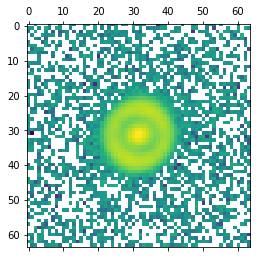

In [2]:
LSST_camera = {'read_noise': 10,  # std of noise generated by read-out (in units of electrons)
               'pixel_scale': 0.263,  # scale (in arcseonds) of pixels
               'ccd_gain': 4.5  # electrons/ADU (analog-to-digital unit). A gain of 8 means that the camera digitizes the CCD signal so that each ADU corresponds to 8 photoelectrons.
              }

LSST_g_band_obs = {'exposure_time': 90.,  # exposure time per image (in seconds)
                   'sky_brightness': 21.7,  # sky brightness (in magnitude per square arcseconds)
                   'magnitude_zero_point': 30,  # magnitude in which 1 count per second per arcsecond square is registered (in ADU's)
                   'num_exposures': 10,  # number of exposures that are combined
                   'seeing': 0.6,  # full width at half maximum of the PSF (if not specific psf_model is specified)
                   'psf_type': 'GAUSSIAN',  # string, type of PSF ('GAUSSIAN' and 'PIXEL' supported)
                   'kernel_point_source': None  # 2d numpy array, model of PSF centered with odd number of pixels per axis (optional when psf_type='PIXEL' is chosen)
                  }

numpix = 64
kwargs_g_band = util.merge_dicts(LSST_camera, LSST_g_band_obs)
kwargs_numerics = {'point_source_supersampling_factor': 1}

cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Ob0=0.)

kwargs_model_physical = {'lens_model_list': ['SIS', 'SIS'],  # list of lens models to be used
                          'lens_redshift_list': [0.4, 0.4],  # list of redshift of the deflections
                          'lens_light_model_list': ['SERSIC_ELLIPSE'],  # list of unlensed light models to be used
                          'source_light_model_list': ['SERSIC_ELLIPSE', 'SERSIC_ELLIPSE'],  # list of extended source models to be used
                          'source_redshift_list': [.8, 1.],  # list of redshfits of the sources in same order as source_light_model_list
                          'cosmo': cosmo,  # astropy.cosmology instance
                          'z_source_convention': 1.,  # source redshfit to which the reduced deflections are computed, is the maximal redshift of the ray-tracing
                          'z_source': 1.,  # redshift of the default source (if not further specified by 'source_redshift_list') and also serves as the redshift of lensed point sources
    }

sim_g = SimAPI(numpix=numpix, kwargs_single_band=kwargs_g_band, kwargs_model=kwargs_model_physical)
imSim_g = sim_g.image_model_class(kwargs_numerics=kwargs_numerics)

kwargs_mass = [{'sigma_v': 300, 'center_x': 0, 'center_y': 0},
              {'sigma_v': 230, 'center_x': 0, 'center_y': 0}]

sim = SimAPI(numpix=numpix, kwargs_single_band=kwargs_g_band, kwargs_model=kwargs_model_physical)

kwargs_lens = sim.physical2lensing_conversion(kwargs_mass=kwargs_mass)

kwargs_source_g = [{'R_sersic': 0.3, 'n_sersic': 1, 'e1': -0.3, 'e2': -0.2, 'center_x': 0, 'center_y': 0, 'amp': 2000},{'R_sersic': 0.3, 'n_sersic': 1, 'e1': -0.3, 'e2': -0.2, 'center_x': 0, 'center_y': 0, 'amp': 2000}] 
kwargs_lens_light_g = [{'R_sersic': 0.6, 'n_sersic': 3, 'e1': 0.1, 'e2': -0.1, 'center_x': 0, 'center_y': 0, 'amp': 9000}, {'R_sersic': 0.6, 'n_sersic': 7, 'e1': 0.1, 'e2': -0.1, 'center_x': 0, 'center_y': 0, 'amp': 4000}]

image_g = imSim_g.image(kwargs_lens, kwargs_source_g, kwargs_lens_light_g)
image_g += sim_g.noise_for_model(model=image_g)

plt.matshow(np.log10(image_g))
plt.show()